# This script contains:

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os

# Importing Datasets
df1=pd.read_csv(r'/Users/navneetjha/Desktop/Career foundry Docs/exercises/Data Immersion /Achievement 6/Exercises/Dataset/gun_violence_wrangled',index_col=False)

In [3]:
df1.head()

,incident_id,date,state,city/county,address,n_killed,n_injured,congressional_district,gun_stolen,gun_type,...,latitude,longitude,n_guns_involved,age,age_group,gender,status,type,state_house_district,state_senate_district
0,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,9.0,0::Unknown||1::Unknown,0::Unknown||1::Unknown,...,41.4455,-82.1377,2.0,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,56.0,13.0
1,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,6.0,0::Unknown||1::Unknown,0::Handgun||1::Handgun,...,36.1140,-79.9569,2.0,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,62.0,27.0
2,479363,2013-01-19,New Mexico,Albuquerque,2806 Long Lane,5,0,1.0,0::Unknown||1::Unknown,0::22 LR||1::223 Rem [AR-15],...,34.9791,-106.7160,2.0,0::51||1::40||2::9||3::5||4::2||5::15,0::Adult 18+||1::Adult 18+||2::Child 0-11||3::...,0::Male||1::Female||2::Male||3::Female||4::Fem...,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,10.0,14.0
3,491674,2013-01-23,Tennessee,Chattanooga,1501 Dodds Ave,1,3,3.0,0::Unknown,0::Unknown,...,35.0221,-85.2697,1.0,0::19,0::Adult 18+,0::Male||1::Male||2::Male||3::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,28.0,10.0
4,479413,2013-01-25,Missouri,Saint Louis,W Florissant Ave and Riverview Blvd,1,3,1.0,0::Unknown,0::Unknown,...,38.7067,-90.2494,1.0,0::28,0::Adult 18+,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,76.0,4.0


## What kind of guns are frequently involved in the violence?
## What happens to guns involved in violence?

In [5]:
# Splitting gun column into multiple columns
def split_gun_column(df1, column_name, category_mapping):
    category_counts = {new_col: [] for new_col in category_mapping.values()}

    for entry in df1[column_name].fillna(''):
        counts = {key: 0 for key in category_mapping.values()}
        
        for item in entry.split('||'):
            if '::' in item:
                idx, category = item.split('::')
                if category in category_mapping:
                    counts[category_mapping[category]] += 1
        
        for key in counts:
            category_counts[key].append(counts[key])
    
    counts_df = pd.DataFrame(category_counts)
    df1 = pd.concat([df1, counts_df], axis=1)
    
    return df1
# Defining category mappings for each gun column
gun_type_mapping = {'Unknown':'G.T_unknown',
                    'Handgun':'G.T_Handgun',
                    '9mm': 'G.T_9mm',
                    'Shotgun': 'G.T_Shotgun',
                    '45 Auto': 'G.T_45 Auto',
                    '223 Rem [AR-15]': 'G.T_223 Rem [AR-15]',
                    '7.62 [AK-47]':'G.T_7.62 [AK-47]',
                    'Rifle':'G.T_Rifle',
                    '357 Mag':'G.T_357 Mag',
                    '22 LR':'G.T_22LR'}

gun_stolen_mapping= {'Unknown':'stolen_status_unknown',
                     'Stolen':'stolen_status_stolen',
                     'Not-stolen':'stolen_status_not_stolen'}
# Split each gun_column
df1 = split_gun_column(df1, 'gun_type', gun_type_mapping)
df1 = split_gun_column(df1, 'gun_stolen', gun_stolen_mapping)

In [6]:
df1.shape

(45403, 34)

In [7]:
df1.columns

Index(['incident_id', 'date', 'state', 'city/county', 'address', 'n_killed',
       'n_injured', 'congressional_district', 'gun_stolen', 'gun_type',
       'incident_characteristics', 'latitude', 'longitude', 'n_guns_involved',
       'age', 'age_group', 'gender', 'status', 'type', 'state_house_district',
       'state_senate_district', 'G.T_unknown', 'G.T_Handgun', 'G.T_9mm',
       'G.T_Shotgun', 'G.T_45 Auto', 'G.T_223 Rem [AR-15]', 'G.T_7.62 [AK-47]',
       'G.T_Rifle', 'G.T_357 Mag', 'G.T_22LR', 'stolen_status_unknown',
       'stolen_status_stolen', 'stolen_status_not_stolen'],
      dtype='object')

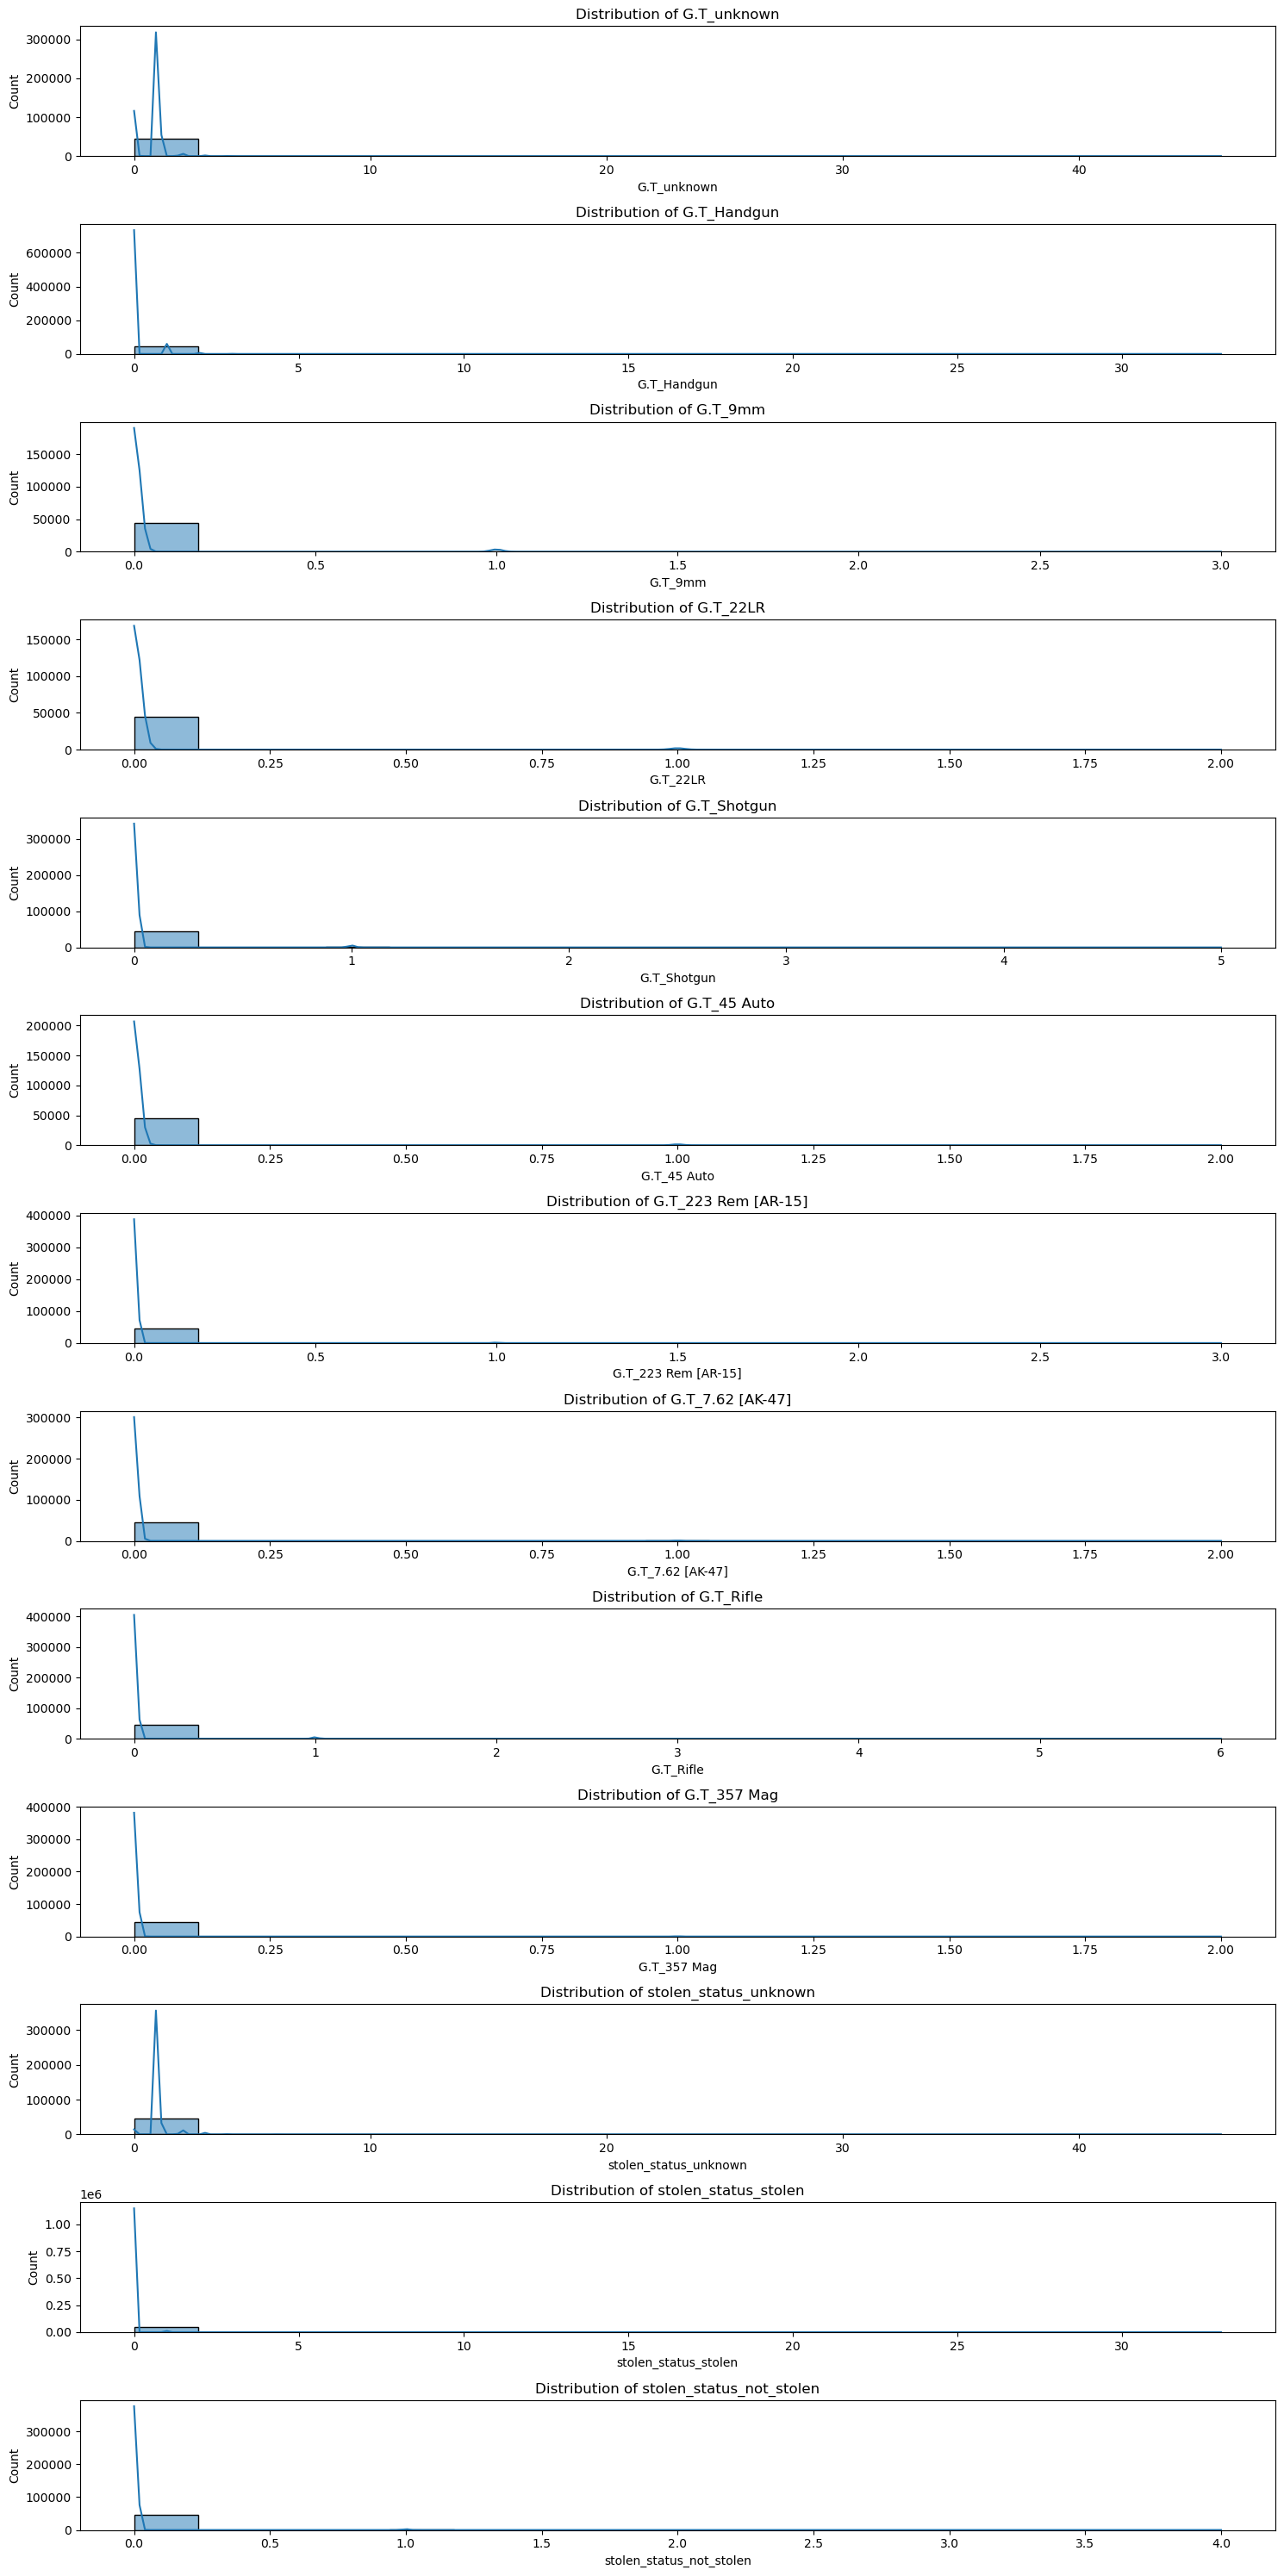

In [8]:
# Plotting distribution of relevant columns
columns = ['G.T_unknown', 'G.T_Handgun', 'G.T_9mm','G.T_22LR',
       'G.T_Shotgun', 'G.T_45 Auto', 'G.T_223 Rem [AR-15]', 'G.T_7.62 [AK-47]',
       'G.T_Rifle', 'G.T_357 Mag', 'stolen_status_unknown',
       'stolen_status_stolen', 'stolen_status_not_stolen']

distribution_df = df1[columns]
num_cols = distribution_df.shape[1]

plt.figure(figsize=(15, 30))
for i, col in enumerate(distribution_df.columns):
    plt.subplot(num_cols, 1, i + 1)
    sns.histplot(distribution_df[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [9]:
#Export of data
df1.to_csv('gun_violence_comprehensive_II.csv',index=False)

In [10]:
df1.head()

,incident_id,date,state,city/county,address,n_killed,n_injured,congressional_district,gun_stolen,gun_type,...,G.T_Shotgun,G.T_45 Auto,G.T_223 Rem [AR-15],G.T_7.62 [AK-47],G.T_Rifle,G.T_357 Mag,G.T_22LR,stolen_status_unknown,stolen_status_stolen,stolen_status_not_stolen
0,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,9.0,0::Unknown||1::Unknown,0::Unknown||1::Unknown,...,0,0,0,0,0,0,0,2,0,0
1,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,6.0,0::Unknown||1::Unknown,0::Handgun||1::Handgun,...,0,0,0,0,0,0,0,2,0,0
2,479363,2013-01-19,New Mexico,Albuquerque,2806 Long Lane,5,0,1.0,0::Unknown||1::Unknown,0::22 LR||1::223 Rem [AR-15],...,0,0,1,0,0,0,1,2,0,0
3,491674,2013-01-23,Tennessee,Chattanooga,1501 Dodds Ave,1,3,3.0,0::Unknown,0::Unknown,...,0,0,0,0,0,0,0,1,0,0
4,479413,2013-01-25,Missouri,Saint Louis,W Florissant Ave and Riverview Blvd,1,3,1.0,0::Unknown,0::Unknown,...,0,0,0,0,0,0,0,1,0,0


In [11]:
df1[['gun_type','G.T_unknown', 'G.T_Handgun', 'G.T_9mm','G.T_22LR',
       'G.T_Shotgun', 'G.T_45 Auto', 'G.T_223 Rem [AR-15]', 'G.T_7.62 [AK-47]',
       'G.T_Rifle', 'G.T_357 Mag']].head()

,gun_type,G.T_unknown,G.T_Handgun,G.T_9mm,G.T_22LR,G.T_Shotgun,G.T_45 Auto,G.T_223 Rem [AR-15],G.T_7.62 [AK-47],G.T_Rifle,G.T_357 Mag
0,0::Unknown||1::Unknown,2,0,0,0,0,0,0,0,0,0
1,0::Handgun||1::Handgun,0,2,0,0,0,0,0,0,0,0
2,0::22 LR||1::223 Rem [AR-15],0,0,0,1,0,0,1,0,0,0
3,0::Unknown,1,0,0,0,0,0,0,0,0,0
4,0::Unknown,1,0,0,0,0,0,0,0,0,0


In [22]:
df2=df1[['gun_type','G.T_unknown', 'G.T_Handgun', 'G.T_9mm','G.T_22LR',
       'G.T_Shotgun', 'G.T_45 Auto', 'G.T_223 Rem [AR-15]', 'G.T_7.62 [AK-47]',
       'G.T_Rifle', 'G.T_357 Mag']]

In [24]:
df2.head(50)

,gun_type,G.T_unknown,G.T_Handgun,G.T_9mm,G.T_22LR,G.T_Shotgun,G.T_45 Auto,G.T_223 Rem [AR-15],G.T_7.62 [AK-47],G.T_Rifle,G.T_357 Mag
0,0::Unknown||1::Unknown,2,0,0,0,0,0,0,0,0,0
1,0::Handgun||1::Handgun,0,2,0,0,0,0,0,0,0,0
2,0::22 LR||1::223 Rem [AR-15],0,0,0,1,0,0,1,0,0,0
3,0::Unknown,1,0,0,0,0,0,0,0,0,0
4,0::Unknown,1,0,0,0,0,0,0,0,0,0
5,0::Shotgun,0,0,0,0,1,0,0,0,0,0
6,0::Handgun,0,1,0,0,0,0,0,0,0,0
7,0::9mm,0,0,1,0,0,0,0,0,0,0
8,0::Handgun,0,1,0,0,0,0,0,0,0,0
9,0::45 Auto,0,0,0,0,0,1,0,0,0,0


In [30]:
df2[['G.T_unknown', 'G.T_Handgun', 'G.T_9mm','G.T_22LR',
       'G.T_Shotgun', 'G.T_45 Auto', 'G.T_223 Rem [AR-15]', 'G.T_7.62 [AK-47]',
       'G.T_Rifle', 'G.T_357 Mag']].value_counts().sum()

45403